In [203]:
import os
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import numpy as np
from fontTools.ttLib import TTFont
import urllib.request
from urllib.request import HTTPError
from os import listdir
from os.path import isfile, join

In [159]:
FONTS_URL_PREFIX = "https://unicode-table.com/fonts/u/" # u3200.woff
FONTS_FOLDER_DIR = "fonts/"
FONTS_FILENAMES = ["u" + "{0:0{1}x}".format(0x400*mul,4) + ".woff" for mul in range(193)]
FONTS_KNOWN_404 = [
  "u2dc00.woff",
  "u28000.woff",
  "u25000.woff",
  "u2ec00.woff",
  "u29c00.woff",
  "u2bc00.woff",
  "u26000.woff",
  "u29000.woff",
  "u25800.woff",
  "u1e400.woff",
  "u23c00.woff",
  "u2f000.woff",
  "u2b800.woff",
  "uec00.woff",
  "u2c800.woff",
  "u28400.woff",
  "ue800.woff",
  "u30000.woff",
  "u21000.woff",
  "u2e400.woff",
  "u23800.woff",
  "u22c00.woff",
  "u25400.woff",
  "u27000.woff",
  "u2c400.woff",
  "u21800.woff",
  "u20800.woff",
  "u2cc00.woff",
  "u28c00.woff",
  "u2f400.woff",
  "u2a000.woff",
  "u2d000.woff",
  "u26400.woff",
  "u2a800.woff",
  "u24000.woff",
  "u21c00.woff",
  "ue000.woff",
  "u2d400.woff",
  "u22000.woff",
  "u2b400.woff",
  "u2e800.woff",
  "u2ac00.woff",
  "u20400.woff",
  "u2d800.woff",
  "u20c00.woff",
  "u2c000.woff",
  "u27c00.woff",
  "u2f800.woff",
  "u24800.woff",
  "u22400.woff",
  "u24c00.woff",
  "u27400.woff",
  "u24400.woff",
  "u26800.woff",
  "u26c00.woff",
  "u29800.woff",
  "u2b000.woff",
  "ue400.woff",
  "u25c00.woff",
  "u20000.woff",
  "u28800.woff",
  "u23400.woff",
  "u22800.woff",
  "u27800.woff",
  "u21400.woff",
  "u2e000.woff",
  "u23000.woff",
  "u2a400.woff",
  "u2fc00.woff",
  "u29400.woff"
]

In [160]:
# Retrieve missing fonts from unicode-table.com
existing_f = [f for f in listdir(FONTS_FOLDER_DIR) if isfile(join(FONTS_FOLDER_DIR, f))]
remaining = set(FONTS_FILENAMES).difference(set(existing_f))
remaining = remaining.difference(set(FONTS_KNOWN_404))
print("missing " + str(len(remaining)) + " fonts")
for filename in remaining:
    try:
        urllib.request.urlretrieve(FONTS_URL_PREFIX + filename, FONTS_FOLDER_DIR + filename)
    except HTTPError:
        print("\"" + filename + "\",")

missing 0 fonts


In [208]:
# Manually calibrate using chars 791, 64950, 65013!!!
def uniToImg(font, num, font_size, W, H):
    img = Image.new("RGB", (W,H),(255,255,255))
    char = chr(num)
    draw = ImageDraw.Draw(img)
    w, h = draw.textsize(char, font=font)
    draw.text(((W-w)/2,(H-h)/2), char, (0,0,0), font=font)
    return img

def createFolders(filepath):
    if not os.path.exists(os.path.dirname(filepath)):
        try:
            os.makedirs(os.path.dirname(filepath))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

def saveSingleChar(filename, size):
    high_res_font_size = size
    high_res_W = int(high_res_font_size*2.1)
    high_res_H = high_res_W
    fps = filename.split("_")
    font_name = fps[0] + ".woff"
    code = int(fps[1].split(".")[0])
    fontpath = join(FONTS_FOLDER_DIR, font_name)
    img_font = ImageFont.truetype(fontpath, high_res_font_size)
    img = uniToImg(img_font, code, high_res_font_size, high_res_W, high_res_H)
    write_path = "chars_{0}-{1}x{2}/{3}_{4}.png".format(high_res_font_size,
                                                        high_res_W, high_res_H,
                                                        font_file.split('.')[0],
                                                        str(font_key))
    createFolders(write_path)
    img.save(write_path)
    return img

In [169]:
FONT_SIZE = 20
IMG_DIM_X = int(FONT_SIZE*2.1)
IMG_DIM_Y = IMG_DIM_X
# tmp_f = [existing_f[0]]

for font_file in existing_f:
    fontpath = join(FONTS_FOLDER_DIR, font_file)
    ttfont = TTFont(fontpath)
    font_keys = list(ttfont['cmap'].tables[0].cmap.keys())
    img_font = ImageFont.truetype(fontpath, FONT_SIZE)
    imgs = list(map(lambda num: uniToImg(img_font, num, FONT_SIZE, IMG_DIM_X, IMG_DIM_Y), font_keys))
    tmpwritefilename = "chars_{0}-{1}x{2}/a_b.png".format(FONT_SIZE, IMG_DIM_X, IMG_DIM_Y)
    createFolders(tmpwritefilename)
    
    for img, font_key in zip(imgs, font_keys):
        img.save("chars_{0}-{1}x{2}/{3}_{4}.png".format(FONT_SIZE,
                                                        IMG_DIM_X,
                                                        IMG_DIM_Y,
                                                        font_file.split('.')[0],
                                                        str(font_key)))

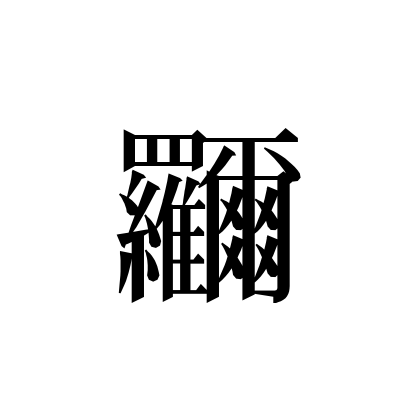

In [210]:
showHighRes("u9c00_40929.png", 200)